# MCMC - Rejection Sampling

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import random
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [3]:
fontsize = 40
scattersize=100
surf_labelpad = 50.

plt.style.use("seaborn")
plt.rcParams.update({'figure.figsize': (20,15), 'font.size': fontsize, 'axes.labelsize': fontsize, 'axes.labelpad': 15., 'text.usetex':True, 'xtick.labelsize': fontsize, 'xtick.major.pad': 20., 'ytick.labelsize': fontsize, 'ytick.major.pad': 20., })

In [4]:
rng = np.random.RandomState(13)

## Example: Mixture of Gaussians

Define target, $p(x)$, and proposal, $q(x)$:

In [5]:
def p(x):
    return 0.3*sp.stats.norm.pdf(x, loc=30, scale=10) + 0.7*sp.stats.norm.pdf(x, loc=80, scale=20)


def q(x):
    return sp.stats.norm.pdf(x, loc=50, scale=30)


Rejection sampling:

In [6]:
def plot_proposal(fig, ax, x, pdf_target, pdf_proposal, z, kq_z, p_z, accepted=None, i=None, colors=None, plot_pz=True):   
    if colors is None:
        colors = ['darkorange', 'navy', 'cornflowerblue']
    ylim = max(pdf_proposal)
    ylim += ylim*0.05

    ax.cla()

    if i is not None:
        fig.suptitle('Iteration %i' % (i + 1))
    if accepted is not None:
        color = 'g' if accepted else 'r'
    else:
        color = 'k'
        
    # Plot prior
    ax.plot(x, pdf_target, color=colors[0], linewidth=2.5, label='Target pdf, $p(z)$')
    ax.plot(x, pdf_proposal, color=colors[1], linewidth=2.5, label='Comparison function, $k\,q(z)$')

    # Stem plot of current sample and proposal:
    ax.plot([z]*2, [0, kq_z], color=color, label='$k\,q(\\tilde{z})$')
    ax.scatter(z, kq_z, s=100, color=color)
    
    if plot_pz:
        ax.scatter(z, p_z, s=200, color=color, label='$p(\\tilde{z})$')

    ax.set(xlabel='$z$', ylabel='Probability Density')
    ax.set_ylim(0,ylim)
    plt.legend(fontsize=fontsize, loc='upper left')

    return ax

In [7]:
def animate(frame, fargs):
    print(frame)
    
    x = fargs['x']
    fig = fargs['fig']
    ax = fargs['ax']
    pdf_target = fargs['pdf_target']
    pdf_proposal = fargs['pdf_proposal']
    z = fargs['trace'][frame]
    kq_z = fargs['hist_kq_z'][frame]
    p_z = fargs['hist_p_z'][frame]
    accepted = fargs['hist_accepted'][frame]


    # z|X \sim N(m, P)
    ax = plot_proposal(fig, ax, x, pdf_target, pdf_proposal, z, kq_z, p_z, accepted, frame)

    return ax

In [8]:
def rejection_sampling(iter=1000, x=None, plot=False):
    samples = []
    if plot:
        fig, ax = plt.subplots()
    trace = []
    hist_kq_z = []
    hist_p_z = []
    hist_accepted = []
        
    for i in range(iter):
        # Insert your code here! Hint: You need to assign the following variables:
        # z = ?
        # u = ?
        # accepted = ?
        
        if accepted:
            samples.append(z)


        trace.append(z)
        hist_kq_z.append(k*q(z))
        hist_p_z.append(p(z))
        hist_accepted.append(accepted)
            
    if plot:
        # Generate animation from history of samples:
        print('Finished simulation. Generating animation...')
        ani = animation.FuncAnimation(fig, animate, frames=iter, 
                                      fargs=[{'fig':fig, 'ax':ax, 'x':x, 
                                              'pdf_target':p(x), 'pdf_proposal':k*q(x),
                                              'trace':trace, 'hist_kq_z':hist_kq_z, 'hist_p_z':hist_p_z, 'hist_accepted':hist_accepted}])
        HTML(ani.to_jshtml())
        print('Finished animation. Saving...')
        ani.save('./RejectionSampling.gif', writer='imagemagick', fps=1, dpi=50)

    return np.array(samples)

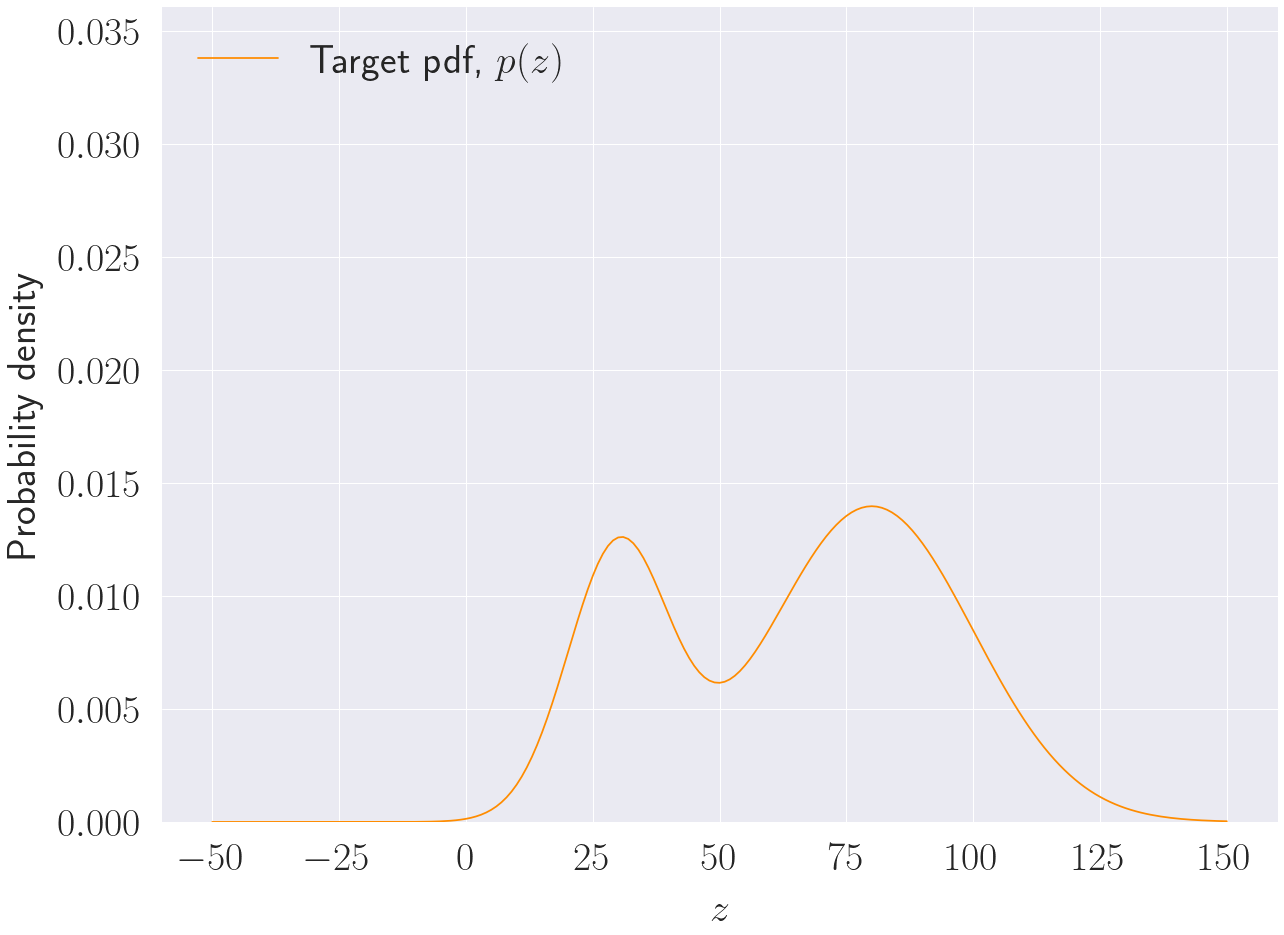

In [10]:
x = np.arange(-50, 151)
k = max(p(x) / q(x))
ylim = max(k*q(x)) 
ylim += ylim*0.05

colors = ['darkorange', 'navy', 'cornflowerblue']

fig, ax = plt.subplots()
plt.plot(x, p(x), color=colors[0], label='Target pdf, $p(z)$')
plt.legend(fontsize=fontsize, loc='upper left')
plt.xlabel('$z$')
plt.ylabel('Probability density')
ax.set_ylim(0,ylim)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, p(x), color=colors[0], label='Target pdf, $p(z)$')
plt.plot(x, q(x), color=colors[1], label='Proposal pdf, $q(z)$')
plt.xlabel('$z$')
plt.ylabel('Probability density')
plt.legend(fontsize=fontsize, loc='upper left')
ax.set_ylim(0,ylim)
plt.show()

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, p(x), color=colors[0], label='Target pdf, $p(z)$')
plt.plot(x, k*q(x), color=colors[1], label='Comparison function, $k\,q(z)$')
plt.xlabel('$z$')
plt.ylabel('Probability density')
ax.set_ylim(0,ylim)
xlim = ax.get_xlim()
plt.legend(fontsize=fontsize, loc='upper left')
plt.show()

In [ ]:
z = 75

fig, ax = plt.subplots()
plot_proposal(fig, ax, x, p(x), k*q(x), z, k*q(z), p(z), plot_pz=False)
plt.legend(fontsize=fontsize, loc='upper left')


In [ ]:
fig, ax = plt.subplots()
plot_proposal(fig, ax, x, p(x), k*q(x), z, k*q(z), p(z), plot_pz=True)
ax.text(z+2, p(z)+p(z)*0.1, '$p(\\tilde{z}) = '+str(round(p(z),3))+'$')
ax.text(z+2, k*q(z)+k*q(z)*0.05, '$k\,q(\\tilde{z}) = '+str(round(k*q(z),3))+'$')
plt.legend(fontsize=fontsize, loc='upper left')

print(p(z))
print(np.random.uniform(0, k*q(z)))

In [ ]:
fig, ax = plt.subplots()
plot_proposal(fig, ax, x, p(x), k*q(x), z, k*q(z), p(z), plot_pz=True)
ax.text(z+2, p(z)+p(z)*0.1, '$p(\\tilde{z}) = '+str(round(p(z),3))+'$')
ax.text(z+2, k*q(z)+k*q(z)*0.05, '$k\,q(\\tilde{z}) = '+str(round(k*q(z),3))+'$')
plt.legend(fontsize=fontsize, loc='upper left')

u = 0.006
plt.scatter(z, u, s=100, color='r')
ax.text(z+2, u+u*0.05, '$u\sim \mathcal{U}[0,k\,q(\\tilde{z})] = '+str(round(u,3))+'$')

print(p(z))
print(np.random.uniform(0, k*q(z)))

In [ ]:
fig, ax = plt.subplots()
plot_proposal(fig, ax, x, p(x), k*q(x), z, k*q(z), p(z), plot_pz=True, accepted=1)
ax.text(z+2, p(z)+p(z)*0.1, '$p(\\tilde{z}) = '+str(round(p(z),3))+'$')
ax.text(z+2, k*q(z)+k*q(z)*0.05, '$k\,q(\\tilde{z}) = '+str(round(k*q(z),3))+'$')
plt.legend(fontsize=fontsize, loc='upper left')

u = 0.006
plt.scatter(z, u, s=100, color='r')
ax.text(z+2, u+u*0.05, '$u\sim \mathcal{U}[0,k\,q(\\tilde{z})] = '+str(round(u,3))+'$')

print(p(z))
print(np.random.uniform(0, k*q(z)))

In [ ]:
samples = rejection_sampling(iter=50, x=x, plot=True)

In [ ]:
samples = rejection_sampling(iter=100000)

In [ ]:
fig, ax = plt.subplots()
plt.plot(x, p(x), color=colors[0], label='Target pdf, $p(z)$')
plt.plot(x, k*q(x), color=colors[1], label='Comparison function, $k\,q(z)$')
plt.hist(samples, density=True, bins=50, alpha=0.5, label='Histogram of samples', color=colors[0])
ax.set_ylim(0,ylim)
ax.set_xlim(xlim)
plt.xlabel('$z$')
plt.ylabel('Probability density')
plt.legend(fontsize=fontsize, loc='upper left')
plt.show()
